In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [260]:
# Load dataset
dataframe = pd.read_csv('3DSC_MP.csv')

# View first two rows
#form = dataframe['formula_sc']
dataframe.head()

/var/folders/sj/6rybm12j2n9b9m1yvtw0335r0000gn/T/ipykernel_440/1710546610.py:2: DtypeWarning: Columns (28,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('3DSC_MP.csv')


,formula_sc,formula_similarity,totreldiff,formula_frac,correct_formula_frac,formula_2,orig_formula_cif,tc,sc_class,sc_class_unique_sc,...,monoclinic,orthorhombic,tetragonal,triclinic,trigonal,primitive,base-centered,body-centered,face-centered,weight
0,Ag0.02Ge2Pd1.98Sr1,2,0.008000,1.0,True,Ag0.02Ge2Pd1.98Sr1,Ge2Pd2Sr1,2.64,Other,True,...,0,0,7,0,0,0,0,1,0,1.0
1,Ag0.15Sn0.85Te1,3,0.150000,1.0,True,Ag0.15Sn0.85Te1,Sn1Te1,2.15,Other,True,...,0,0,0,0,0,0,0,0,1,1.0
2,Ag0.1Ge2Pd1.9Sr1,2,0.040000,1.0,True,Ag0.1Ge2Pd1.9Sr1,Ge2Pd2Sr1,2.62,Other,True,...,0,0,7,0,0,0,0,1,0,1.0
3,Ag0.1In0.9Te1,3,0.100000,1.0,True,Ag0.1In0.9Te1,In1Te1,1.20,Other,True,...,0,0,0,0,0,0,0,0,1,1.0
4,Ag0.2Ba1Si1.8,3,0.133333,4.0,False,Ag0.8Ba4Si7.2,Ba4Si8,3.20,Other,True,...,0,0,0,0,0,1,0,0,0,1.0


In [261]:
#Chemical Formula
form = dataframe['formula_sc']
form.head()

0    Ag0.02Ge2Pd1.98Sr1
1       Ag0.15Sn0.85Te1
2      Ag0.1Ge2Pd1.9Sr1
3         Ag0.1In0.9Te1
4         Ag0.2Ba1Si1.8
Name: formula_sc, dtype: object

In [262]:
#features = dataframe[['formula_sc','efermi_2']]
features = dataframe['efermi_2']
features.head()

0    4.015543
1    6.066451
2    4.015543
3    6.314060
4    5.202543
Name: efermi_2, dtype: float64

In [263]:
# Our targets are the Tc. 
target = dataframe['tc']
target.head()

0    2.64
1    2.15
2    2.62
3    1.20
4    3.20
Name: tc, dtype: float64

In [264]:
featuresR = features.to_numpy()
featuresR = featuresR.reshape(-1, 1)

In [265]:
featuresR[:5]

array([[4.0155429 ],
       [6.06645058],
       [4.0155429 ],
       [6.3140604 ],
       [5.20254346]])

In [266]:
# Create linear regression
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(featuresR, target)

In [267]:
slope = model.coef_[0]
intercept = model.intercept_

In [268]:
print(slope,intercept)

-3.081149844598304 27.990251680903135


In [269]:
model.score(featuresR,target)

0.10085290391965007

In [270]:
model.predict(featuresR)[5]

15.617762298590312

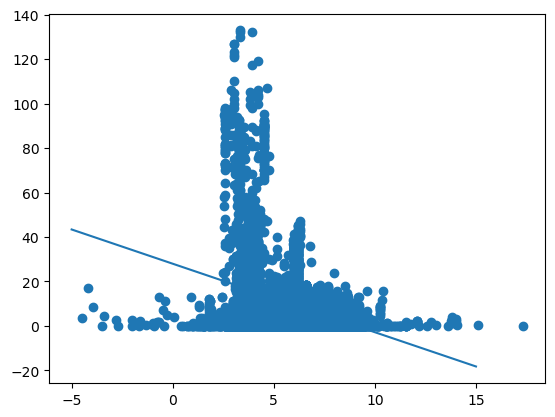

In [271]:
xtest= np.linspace(-5,15,1000)
plt.scatter(features,target)
plt.plot(xtest,xtest*slope+intercept)
plt.show()

In [272]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

In [273]:
KRR = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

In [274]:
KRR.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [276]:
print(f"Best KRR with params: {KRR.best_params_} and R2 score: {KRR.best_score_:.3f}")

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [277]:
KRR.fit(featuresR, target)

GridSearchCV(estimator=KernelRidge(gamma=0.1, kernel='rbf'),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [278]:
print(f"Best KRR with params: {KRR.best_params_} and R2 score: {KRR.best_score_:.3f}")

Best KRR with params: {'alpha': 1.0, 'gamma': 100.0} and R2 score: -0.989


In [279]:
xt2 = xtest.reshape(-1, 1)

In [280]:
KRR_pred=KRR.predict(xt2)

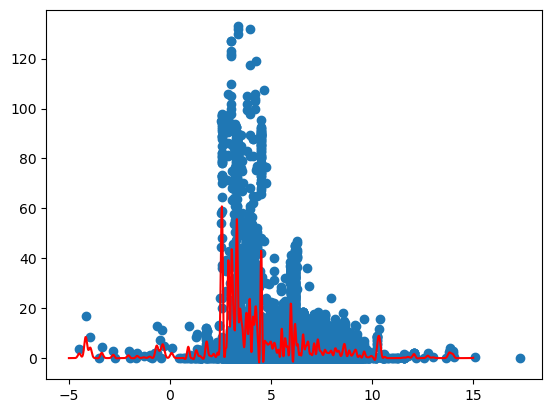

In [281]:
plt.scatter(features,target)
plt.plot(xtest,KRR_pred,'r')
plt.show()

In [282]:
KRR = KernelRidge(kernel="rbf", gamma=2.0,alpha=.1)
KRR.fit(featuresR, target)
KRR_pred=KRR.predict(xt2)

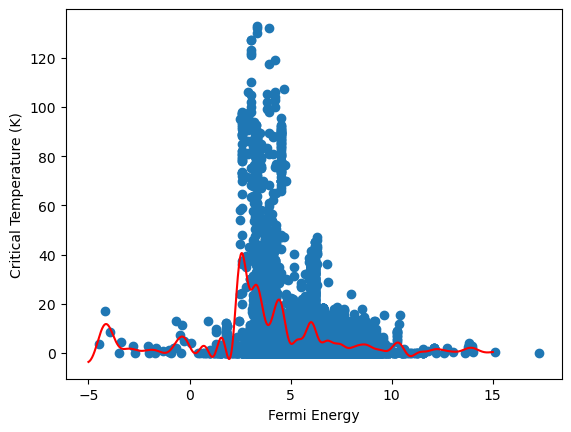

In [284]:
plt.scatter(features,target)
plt.plot(xtest,KRR_pred,'r')
plt.xlabel('Fermi Energy')
plt.ylabel('Critical Temperature (K)')
plt.show()

In [107]:
features.head()

0    4.015543
1    6.066451
2    4.015543
3    6.314060
4    5.202543
Name: efermi_2, dtype: float64

In [171]:
#%%capture 
#Above mutes warnings

#create columns with all zeros for each class. Appropriate class will later be set to one.
# like one hot encoding. 
featuresC = dataframe[['efermi_2','sc_class']]
featuresCC=featuresC.copy()
featuresCC['Carbon']=0
featuresCC['Chevrel']=0
featuresCC['Cuprate']=0
featuresCC['Ferrite']=0
featuresCC['Heavy_fermion']=0
featuresCC['Other']=0
featuresCC['Oxide']=0
featuresCC['OxideHeavy_fermion']=0
featuresCC['Heavy_fermionChevrel']=0


In [172]:
featuresCC.head()

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide,OxideHeavy_fermion,Heavy_fermionChevrel
0,4.015543,Other,0,0,0,0,0,0,0,0,0
1,6.066451,Other,0,0,0,0,0,0,0,0,0
2,4.015543,Other,0,0,0,0,0,0,0,0,0
3,6.314060,Other,0,0,0,0,0,0,0,0,0
4,5.202543,Other,0,0,0,0,0,0,0,0,0


In [156]:
subFC = featuresC.loc[0:15]
subFC.head(20)

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide
0,4.015543,Other,0,0,0,0,0,0,0
1,6.066451,Other,0,0,0,0,0,0,0
2,4.015543,Other,0,0,0,0,0,0,0
3,6.314060,Other,0,0,0,0,0,0,0
4,5.202543,Other,0,0,0,0,0,0,0
5,4.015543,Other,0,0,0,0,0,0,0
6,2.853979,Other,0,0,0,0,0,0,0
7,5.549556,Other,0,0,0,0,0,0,0
8,2.886187,Other,0,0,0,0,0,0,0
9,4.018381,Other,0,0,0,0,0,0,0


In [133]:
subFC.shape[0]

16

In [136]:
subFC.loc[0]['sc_class']=='Other'

True

In [138]:
subFC.loc[0,'Other']=1


In [157]:
subFC.loc[0,'sc_class']='Carbon'


In [158]:
subFC.head()

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide
0,4.015543,Carbon,0,0,0,0,0,0,0
1,6.066451,Other,0,0,0,0,0,0,0
2,4.015543,Other,0,0,0,0,0,0,0
3,6.314060,Other,0,0,0,0,0,0,0
4,5.202543,Other,0,0,0,0,0,0,0


In [153]:
#Loop through all elements in the data frame 
for i in range(subFC.shape[0]):
    scc = subFC.loc[i]['sc_class']
    if scc == 'Carbon':
        subFC.loc[i,'Carbon']=1
    if scc == 'Other':
        subFC.loc[i,'Other']=1
    if scc == 'Chevrel':
        subFC.loc[i,'Chevrel']=1
    if scc == 'Cuprate':
        subFC.loc[i,'Cuprate']=1
    if scc == 'Ferrite':
        subFC.loc[i,'Ferrite']=1
    if scc == 'Heavy_fermion':
        subFC.loc[i,'Heavy Fermion']=1
    if scc == 'Oxide':
        subFC.loc[i,'Oxide']=1

In [159]:
#Loop through all elements in the data frame 
for i in range(subFC.shape[0]):
    scc = subFC.loc[i]['sc_class']
    subFC.loc[i,scc]=1

In [160]:
subFC.head(20)

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide
0,4.015543,Carbon,1,0,0,0,0,0,0
1,6.066451,Other,0,0,0,0,0,1,0
2,4.015543,Other,0,0,0,0,0,1,0
3,6.314060,Other,0,0,0,0,0,1,0
4,5.202543,Other,0,0,0,0,0,1,0
5,4.015543,Other,0,0,0,0,0,1,0
6,2.853979,Other,0,0,0,0,0,1,0
7,5.549556,Other,0,0,0,0,0,1,0
8,2.886187,Other,0,0,0,0,0,1,0
9,4.018381,Other,0,0,0,0,0,1,0


In [173]:
#Loop through all elements in the data frame 
for i in range(featuresCC.shape[0]):
    scc = featuresCC.loc[i]['sc_class']
    featuresCC.loc[i,scc]=1

In [174]:
featuresCC.head()

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide,OxideHeavy_fermion,Heavy_fermionChevrel
0,4.015543,Other,0,0,0,0,0,1,0,0,0
1,6.066451,Other,0,0,0,0,0,1,0,0,0
2,4.015543,Other,0,0,0,0,0,1,0,0,0
3,6.314060,Other,0,0,0,0,0,1,0,0,0
4,5.202543,Other,0,0,0,0,0,1,0,0,0


In [175]:
grouped_data = featuresCC.groupby('sc_class')
count_by_type = grouped_data['sc_class'].count()
print(count_by_type)

sc_class
Carbon                    30
Chevrel                   74
Cuprate                  874
Ferrite                  517
Heavy_fermion            418
Heavy_fermionChevrel       7
Other                   3529
Oxide                    320
OxideHeavy_fermion         4
Name: sc_class, dtype: int64


In [176]:
print(featuresCC['Carbon'].sum())

30


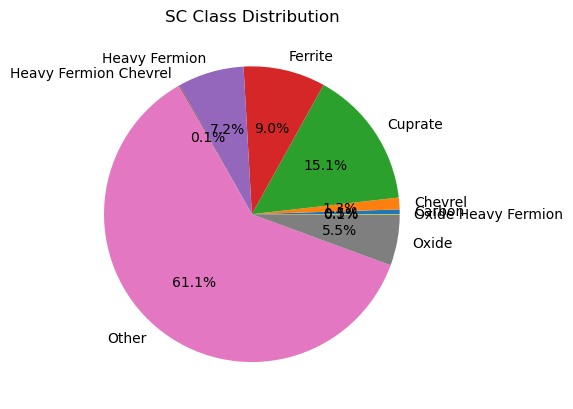

In [189]:
plt.pie(count_by_type, labels=['Carbon','Chevrel',
        'Cuprate','Ferrite','Heavy Fermion','Heavy Fermion Chevrel','Other','Oxide',
                               'Oxide Heavy Fermion'] ,autopct='%1.1f%%')

# Add title
plt.title('SC Class Distribution')

# Show the plot
plt.show()

In [190]:
features = featuresCC.copy()

In [193]:
features.head()

,efermi_2,sc_class,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide,OxideHeavy_fermion,Heavy_fermionChevrel
0,4.015543,Other,0,0,0,0,0,1,0,0,0
1,6.066451,Other,0,0,0,0,0,1,0,0,0
2,4.015543,Other,0,0,0,0,0,1,0,0,0
3,6.314060,Other,0,0,0,0,0,1,0,0,0
4,5.202543,Other,0,0,0,0,0,1,0,0,0


In [196]:
features = features.drop('sc_class',axis=1)

In [197]:
features.head()

,efermi_2,Carbon,Chevrel,Cuprate,Ferrite,Heavy_fermion,Other,Oxide,OxideHeavy_fermion,Heavy_fermionChevrel
0,4.015543,0,0,0,0,0,1,0,0,0
1,6.066451,0,0,0,0,0,1,0,0,0
2,4.015543,0,0,0,0,0,1,0,0,0
3,6.314060,0,0,0,0,0,1,0,0,0
4,5.202543,0,0,0,0,0,1,0,0,0


In [198]:
features.shape

(5773, 10)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=23)

In [236]:
KRR = KernelRidge(kernel="rbf", gamma=2.0,alpha=.1)
KRR.fit(X_train, y_train)


KernelRidge(alpha=0.1, gamma=2.0, kernel='rbf')

In [237]:
KRR_pred=KRR.predict(X_test)

In [238]:
KRR_pred[:5]

array([-1.29982109, 21.67511037,  3.88502802, 67.86816345,  3.27176263])

In [239]:
y_test[:5]

5767     1.675
3760    13.300
3596     0.000
1883    94.200
2600     1.260
Name: tc, dtype: float64

In [240]:
from sklearn.metrics import r2_score
r2_score(y_test, KRR_pred)

0.44214906351873307

In [241]:
KRR_pred_Pos = KRR_pred.copy()

In [242]:
for i in range(len(KRR_pred_Pos)):
    if KRR_pred_Pos[i]<0:
        KRR_pred_Pos[i]=0
        

In [243]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, KRR_pred_Pos)

1.6547287371106787